In [1]:
from pycaret.datasets import get_data
import joblib as jb
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.DataFrame(jb.load('01_EDA_Cleanup.bin'))

In [3]:
df = df.dropna()
df.shape

(56935, 83)

In [4]:
data, data_unseen = train_test_split(df, test_size=0.05, stratify=df['hospital_death'], random_state=42)

In [5]:
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (54088, 83)
Unseen Data For Predictions: (2847, 83)


_______________________________

In [6]:
from pycaret.classification import *

In [7]:
exp_clf101 = setup(data = data, target = 'hospital_death',fix_imbalance = True)

,Description,Value
0,Session id,6628
1,Target,hospital_death
2,Target type,Binary
3,Original data shape,"(54088, 83)"
4,Transformed data shape,"(85445, 120)"
5,Transformed train set shape,"(69218, 120)"
6,Transformed test set shape,"(16227, 120)"
7,Numeric features,61
8,Categorical features,7
9,Preprocess,True


In [8]:
var_optimizar = 'F1'

In [9]:
best_model = compare_models(sort=var_optimizar)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9180,0.8706,0.3764,0.5330,0.4409,0.3981,0.4052,10.3730
lightgbm,Light Gradient Boosting Machine,0.9241,0.0000,0.3339,0.6069,0.4302,0.3932,0.4137,1.0090
et,Extra Trees Classifier,0.9122,0.0000,0.3733,0.4863,0.4222,0.3756,0.3795,1.2860
xgboost,Extreme Gradient Boosting,0.9223,0.0000,0.3306,0.5865,0.4222,0.3840,0.4025,4.9170
rf,Random Forest Classifier,0.9177,0.0000,0.3389,0.5337,0.4142,0.3723,0.3836,3.4600
ada,Ada Boost Classifier,0.8982,0.8491,0.4114,0.4094,0.4101,0.3545,0.3546,2.3040
ridge,Ridge Classifier,0.8230,0.8466,0.6593,0.2772,0.3902,0.3064,0.3459,0.4210
lda,Linear Discriminant Analysis,0.8227,0.8465,0.6587,0.2768,0.3897,0.3057,0.3452,0.5540
dt,Decision Tree Classifier,0.8651,0.0000,0.3807,0.2860,0.3264,0.2532,0.2565,1.1950
lr,Logistic Regression,0.7470,0.8004,0.6953,0.2084,0.3207,0.2173,0.2771,5.7470


In [10]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=6628, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [11]:
# et = create_model('et')
# et_tuned = tune_model(et, optimize=var_optimizar)
# print(f'Modelo Base Extra Trees:\n {et}')
# print(f'Modelo Entrenado Extra Trees:\n {et_tuned}')

In [12]:
# rid = create_model('ridge')
# rid_tuned = tune_model(rid, optimize=var_optimizar)
# print(f'Modelo Base Ridge:\n {rid}')
# print(f'Modelo Entrenado Ridge:\n {rid_tuned}')

In [13]:
lgbm = create_model('lightgbm')
lgbm_tuned = tune_model(lgbm, optimize=var_optimizar)
print(f'Modelo Base LGBM:\n {lgbm}')
print(f'Modelo Entrenado LGBM:\n {lgbm_tuned}')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:56:21
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


KeyboardInterrupt: 

In [ ]:
# rf = create_model('rf')
# rf_tuned = tune_model(rf, optimize=var_optimizar)
# print(f'Modelo Base Random Forest:\n {rf}')
# print(f'Modelo Entrenado Random Forest:\n {rf_tuned}')

In [ ]:
# qda = create_model('qda')
# qda_tuned = tune_model(qda, optimize=var_optimizar)
# print(f'Modelo Base QDA:\n {qda}')
# print(f'Modelo Entrenado QDA:\n {qda_tuned}')

In [ ]:
# nb = create_model('nb')
# nb_tuned = tune_model(nb, optimize=var_optimizar)
# print(f'Modelo Base Naive Bayes:\n {nb}')
# print(f'Modelo Entrenado Naive Bayes:\n {nb_tuned}')

In [ ]:
lda = create_model('lda')
lda_tuned = tune_model(lda, optimize=var_optimizar)
print(f'Modelo Base LDA:\n {lda}')
print(f'Modelo Entrenado LDA:\n {lda_tuned}')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9158,0.8597,0.3773,0.5146,0.4354,0.3910,0.3966
1,0.9184,0.8754,0.3631,0.5364,0.4330,0.3908,0.3995
2,0.9181,0.8728,0.3631,0.5339,0.4322,0.3898,0.3983
3,0.9213,0.8690,0.3723,0.5628,0.4481,0.4077,0.4178
4,0.9155,0.8562,0.3662,0.5107,0.4265,0.3822,0.3884
5,0.9120,0.8450,0.3323,0.4821,0.3934,0.3478,0.3548
6,0.9208,0.8615,0.3600,0.5598,0.4382,0.3977,0.4090
7,0.9216,0.8481,0.3877,0.5625,0.4590,0.4183,0.4267
8,0.9260,0.8673,0.4031,0.6037,0.4834,0.4453,0.4558


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9158,0.8595,0.3773,0.5146,0.4354,0.3910,0.3966
1,0.9184,0.8754,0.3631,0.5364,0.4330,0.3908,0.3995
2,0.9181,0.8726,0.3631,0.5339,0.4322,0.3898,0.3983
3,0.9213,0.8690,0.3754,0.5622,0.4502,0.4096,0.4193
4,0.9152,0.8561,0.3662,0.5085,0.4258,0.3813,0.3873
5,0.9118,0.8455,0.3323,0.4800,0.3927,0.3469,0.3537
6,0.9210,0.8617,0.3600,0.5625,0.4390,0.3987,0.4103
7,0.9210,0.8477,0.3877,0.5575,0.4574,0.4162,0.4242
8,0.9258,0.8674,0.4031,0.6009,0.4825,0.4442,0.4545


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Modelo Base LDA:
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)
Modelo Entrenado LDA:
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


In [14]:
xgb = create_model('xgboost')
xgb_tuned = tune_model(xgb, optimize=var_optimizar)
print(f'Modelo Base XGB:\n {xgb}')
print(f'Modelo Entrenado XGB:\n {xgb_tuned}')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9237,0.0000,0.3466,0.5979,0.4388,0.4010,0.4182
1,0.9213,0.0000,0.3415,0.5692,0.4269,0.3875,0.4021
2,0.9208,0.0000,0.3046,0.5723,0.3976,0.3594,0.3800
3,0.9271,0.0000,0.3477,0.6384,0.4502,0.4148,0.4368
4,0.9216,0.0000,0.3477,0.5707,0.4321,0.3926,0.4066
5,0.9239,0.0000,0.3231,0.6069,0.4217,0.3850,0.4070
6,0.9213,0.0000,0.3169,0.5754,0.4087,0.3703,0.3893
7,0.9202,0.0000,0.3046,0.5657,0.3960,0.3574,0.3771
8,0.9223,0.0000,0.3169,0.5886,0.4120,0.3744,0.3951


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9020,0.0000,0.5337,0.4427,0.4840,0.4304,0.4327
1,0.9002,0.0000,0.5015,0.4301,0.4631,0.4084,0.4099
2,0.8965,0.0000,0.4769,0.4111,0.4416,0.3849,0.3862
3,0.9028,0.0000,0.5108,0.4427,0.4743,0.4210,0.4223
4,0.8933,0.0000,0.4954,0.4015,0.4435,0.3852,0.3878
5,0.9039,0.0000,0.5231,0.4485,0.4830,0.4303,0.4318
6,0.8949,0.0000,0.5077,0.4094,0.4533,0.3959,0.3987
7,0.8933,0.0000,0.4954,0.4015,0.4435,0.3852,0.3878
8,0.8941,0.0000,0.5138,0.4073,0.4544,0.3966,0.3999


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Modelo Base XGB:
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)
Modelo Entrenado XGB:
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsam

_________________

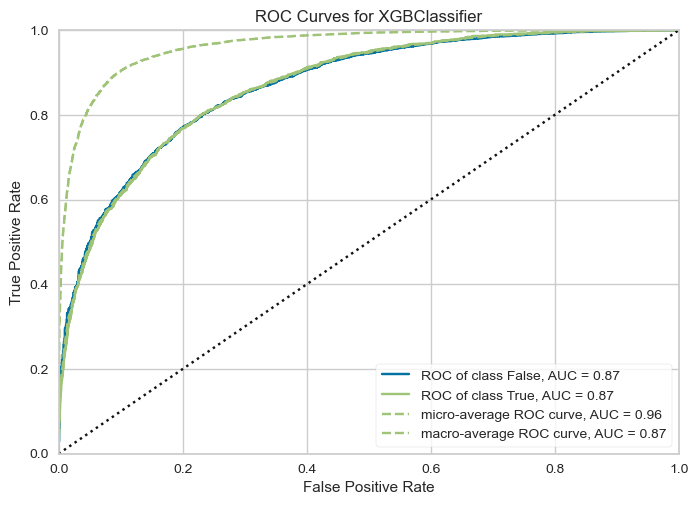

In [15]:
plot_model(xgb_tuned, plot = 'auc')

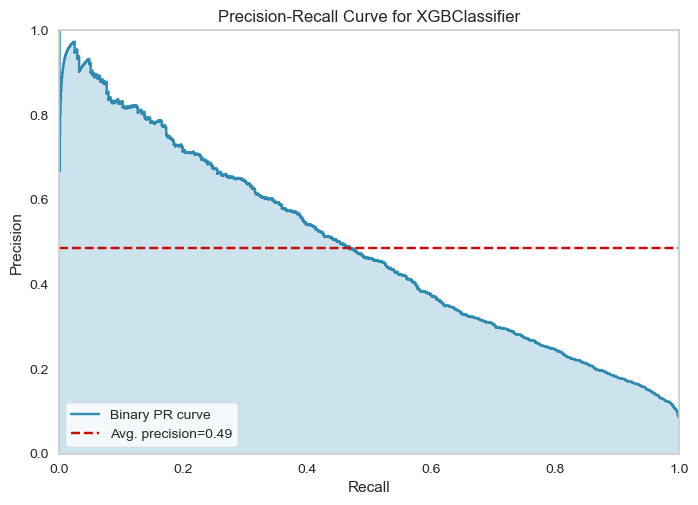

In [16]:
plot_model(xgb_tuned, plot = 'pr')

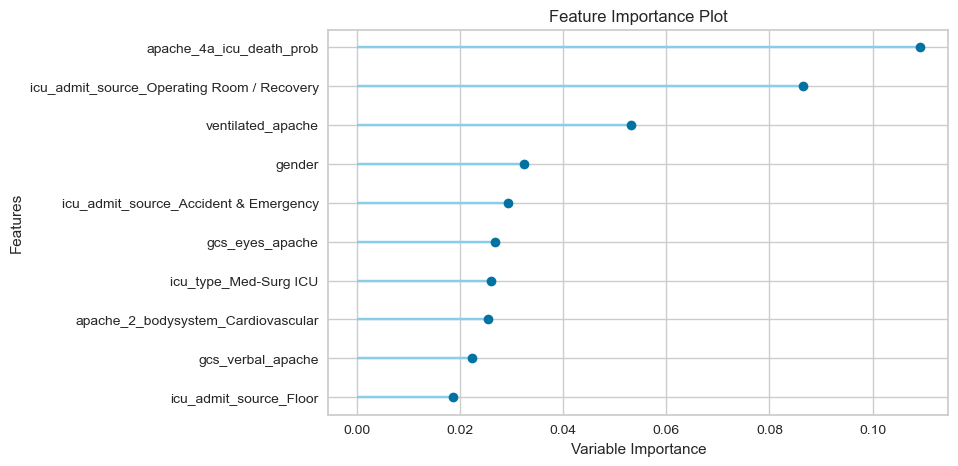

In [17]:
plot_model(xgb_tuned, plot='feature')

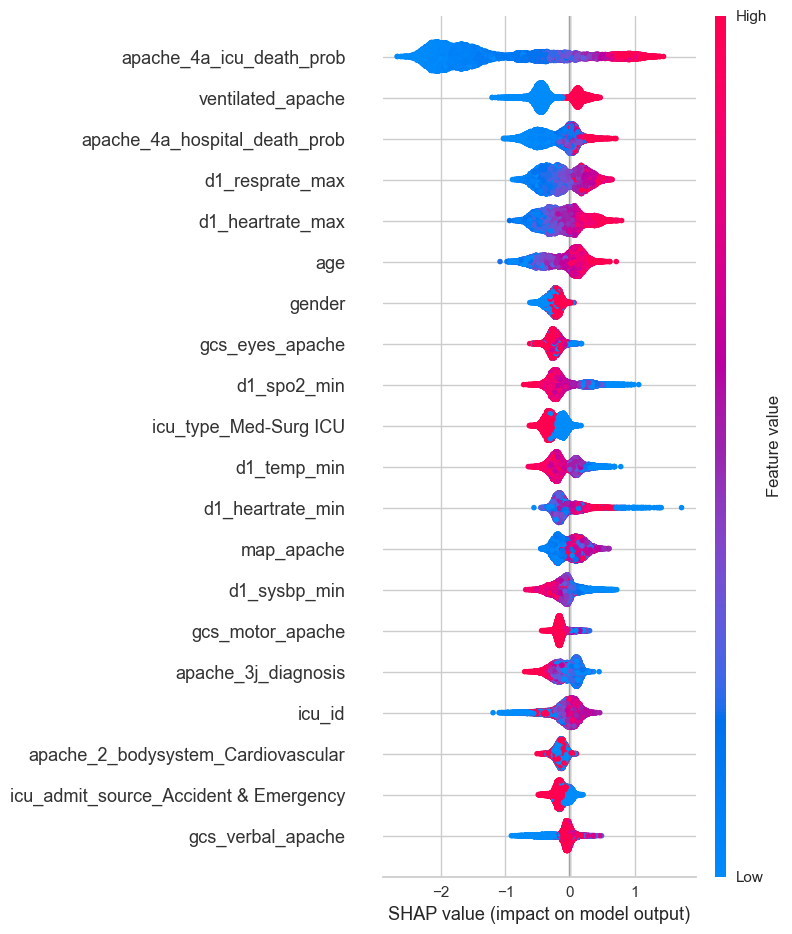

In [22]:
interpret_model(xgb_tuned)
#plot_model(xgb_tuned, plot='shap')

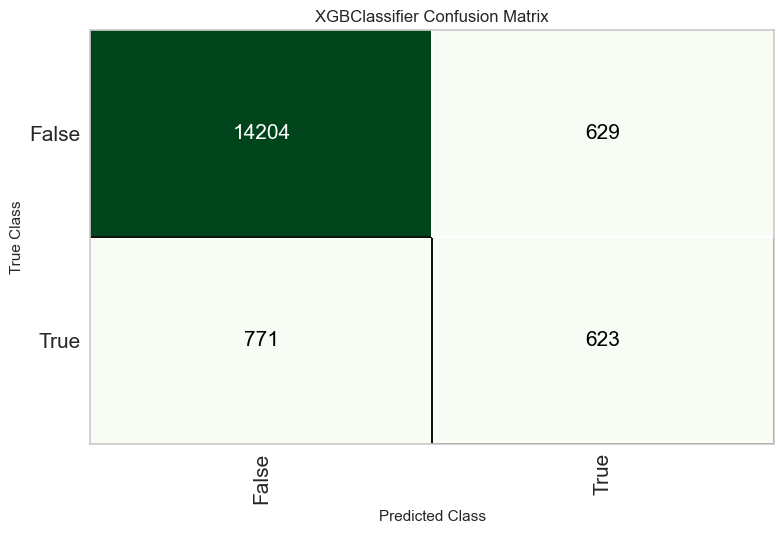

In [ ]:
plot_model(xgb_tuned, plot = 'confusion_matrix')

In [ ]:
evaluate_model(xgb_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Predict on test

In [ ]:
predict_model(xgb_tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9269,0.8755,0.2912,0.6711,0.4062,0.3736,0.4109


,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,prediction_label,prediction_score
83372,10094,18,85,22.599269,False,Caucasian,M,182.9,Floor,804,...,False,False,False,False,False,Sepsis,Cardiovascular,False,0,0.9229
879,93898,31,65,28.317836,False,Caucasian,M,182.0,Accident & Emergency,83,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9969
66861,119848,19,67,26.384132,False,Caucasian,M,163.0,Accident & Emergency,653,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9871
55332,85586,8,81,24.75102,True,Caucasian,M,175.0,Operating Room / Recovery,597,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,0.9805
49481,1054,189,78,25.767949,True,Caucasian,M,182.9,Operating Room / Recovery,543,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,0.8149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21186,101003,79,87,23.54824,False,Other/Unknown,F,162.0,Accident & Emergency,337,...,False,False,False,False,False,Trauma,Trauma,False,0,0.9621
65981,61256,19,40,34.998887,False,Caucasian,F,165.1,Floor,653,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,0.9948
24951,51546,112,86,53.578243,False,Caucasian,F,167.6,Floor,384,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9209
44516,80975,14,72,24.228395,False,Caucasian,M,180.0,Accident & Emergency,489,...,False,False,False,False,False,Genitourinary,Renal/Genitourinary,False,0,0.9348


### Finalize Model

In [ ]:
final_dt = finalize_model(xgb_tuned)

In [ ]:
print(final_dt)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['encounter_id', 'hospital_id',
                                             'age', 'bmi', 'height', 'icu_id',
                                             'pre_icu_los_days', 'weight',
                                             'apache_2_diagnosis',
                                             'apache_3j_diagnosis',
                                             'gcs_eyes_apache',
                                             'gcs_motor_apache',
                                             'gcs_verbal_apache',
                                             'heart_rate_apache', 'map_apache',
                                             'resprate_apache', 'temp...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
        

In [ ]:
predict_model(final_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9446,0.9523,0.4168,0.8711,0.5638,0.5381,0.5801


,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,prediction_label,prediction_score
83372,10094,18,85,22.599269,False,Caucasian,M,182.9,Floor,804,...,False,False,False,False,False,Sepsis,Cardiovascular,False,0,0.9327
879,93898,31,65,28.317836,False,Caucasian,M,182.0,Accident & Emergency,83,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9956
66861,119848,19,67,26.384132,False,Caucasian,M,163.0,Accident & Emergency,653,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9835
55332,85586,8,81,24.75102,True,Caucasian,M,175.0,Operating Room / Recovery,597,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,0.9792
49481,1054,189,78,25.767949,True,Caucasian,M,182.9,Operating Room / Recovery,543,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,0.7319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21186,101003,79,87,23.54824,False,Other/Unknown,F,162.0,Accident & Emergency,337,...,False,False,False,False,False,Trauma,Trauma,False,0,0.9546
65981,61256,19,40,34.998887,False,Caucasian,F,165.1,Floor,653,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,0.9952
24951,51546,112,86,53.578243,False,Caucasian,F,167.6,Floor,384,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9354
44516,80975,14,72,24.228395,False,Caucasian,M,180.0,Accident & Emergency,489,...,False,False,False,False,False,Genitourinary,Renal/Genitourinary,False,0,0.9387


In [ ]:
unseen_predictions = predict_model(final_dt, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9210,0.8833,0.2571,0.5943,0.3590,0.3238,0.3564


,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,prediction_label,prediction_score
40102,30740,54,59,22.264933,True,African American,M,190.5,Operating Room / Recovery,474,...,False,False,False,False,False,Respiratory,Respiratory,True,0,0.9178
79830,14125,196,36,34.186179,False,Caucasian,F,152.4,Floor,829,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.6640
11075,125979,174,82,27.516419,False,African American,F,162.6,Accident & Emergency,212,...,False,False,False,False,False,Sepsis,Cardiovascular,False,1,0.7809
32646,2853,10,77,17.19067,False,Caucasian,F,162.6,Accident & Emergency,428,...,False,False,False,False,False,Neurological,Neurologic,False,0,0.9418
18152,25809,76,61,32.066658,False,Hispanic,M,178.0,Floor,256,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,True,0,0.9691


In [ ]:
from pycaret.utils.generic import check_metric
res_acc = check_metric(unseen_predictions['hospital_death'], unseen_predictions['prediction_label'], metric = 'Accuracy')
res_prec = check_metric(unseen_predictions['hospital_death'], unseen_predictions['prediction_label'], metric = 'Precision')
res_rec = check_metric(unseen_predictions['hospital_death'], unseen_predictions['prediction_label'], metric = 'Recall')
res_f1 = check_metric(unseen_predictions['hospital_death'], unseen_predictions['prediction_label'], metric = 'F1')

print(f'El resultado final es: \n Accuracy: {res_acc}\n Precision: {res_prec}\n Recall: {res_rec}\n F1: {res_f1}\n')

El resultado final es: 
 Accuracy: 0.921
 Precision: 0.5943
 Recall: 0.2571
 F1: 0.359



In [ ]:
save_model(final_dt,'./FinalModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['encounter_id', 'hospital_id',
                                              'age', 'bmi', 'height', 'icu_id',
                                              'pre_icu_los_days', 'weight',
                                              'apache_2_diagnosis',
                                              'apache_3j_diagnosis',
                                              'gcs_eyes_apache',
                                              'gcs_motor_apache',
                                              'gcs_verbal_apache',
                                              'heart_rate_apache', 'map_apache',
                                              'resprate_apache', 'temp...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='s